In [1]:
!apt-get install git # instalar Git en el entorno de ejecución.
!pip install Pillow # instalar Pillow, una biblioteca de procesamiento de imágenes para Python.
!pip install matplotlib #instalar Matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


## Descarga del Dataset desde GitHub

El siguiente código descarga un dataset específico desde un repositorio de GitHub utilizando `sparseCheckout` para obtener solo la carpeta necesaria. Esta técnica es útil y necesaria en este caso para el manejo de datasets grandes como es el caso


In [2]:
# Definir las variables del repositorio de GitHub, la rama y la carpeta que queremos descargar
REPO="https://github.com/CamiloVelezP/DetecionDeMascarillas"
BRANCH="main"
FOLDER="dataset"

# Inicializar un nuevo repositorio de Git en una carpeta temporal llamada 'temp_repo', en esta vamos a bajar una carpeta especifica de un repositorio
!git init temp_repo
%cd temp_repo
!git remote add origin $REPO
!git config core.sparseCheckout true
!echo $FOLDER/ > .git/info/sparse-checkout
!git pull origin $BRANCH
%cd ..

# Nos salimos de la carpeta del repositorio temporal y lo eliminamos
!mv temp_repo/$FOLDER .
!rm -rf temp_repo

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/temp_repo/.git/
/content/temp_repo
remote: Enumerating objects: 8845, done.
remote: Total 8845 (delta 0), reused 0 (delta 0), pack-reused 8845
Receiving objects: 100% (8845/8845), 216.38 MiB | 16.04 MiB/s, done.
Resolving deltas: 100% (4/4), done.
From https://github.com/CamiloVelezP/DetecionDeMascarillas
 * branch            main       -> FETCH_HEAD
 * [new branch]      main       -> origin/main
Updating files: 100% (8982/8982), done.
/content


In [3]:
import matplotlib.pyplot as plt
import os
from PIL import Image
from collections import defaultdict

## Conteo de Imágenes en el Dataset

Este fragmento de código cuenta la cantidad de imágenes en cada subcarpeta del dataset y muestra el resultado.


In [4]:
# Ruta de la carpeta con el dataset
base_dir = '/content/dataset/'

# Lista de carpetas dentro de la carpeta principal
carpetas = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]

# Contar imágenes en cada carpeta
conteo_imagenes = {}
for carpeta in carpetas:
    carpeta_path = os.path.join(base_dir, carpeta)
    imagenes = [f for f in os.listdir(carpeta_path) if os.path.isfile(os.path.join(carpeta_path, f))]
    conteo_imagenes[carpeta] = len(imagenes)

# Mostrar el conteo de imágenes
for carpeta, conteo in conteo_imagenes.items():
    print(f'Carpeta "{carpeta}" contiene {conteo} imágenes.')

Carpeta "mask_weared_incorrect" contiene 2994 imágenes.
Carpeta "without_mask" contiene 2994 imágenes.
Carpeta "with_mask" contiene 2994 imágenes.


## Gráfico del Conteo de Imágenes por Carpeta

Creación de un gráfico de barras que muestra el número de imágenes en cada subcarpeta del dataset.


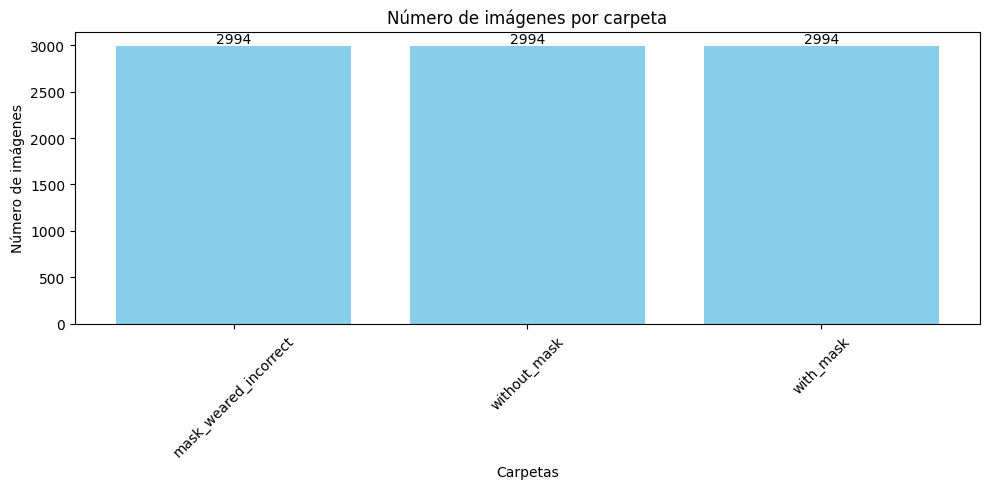

In [5]:
# Obtener las listas de nombres de carpetas y sus conteos de imágenes
carpetas = list(conteo_imagenes.keys())
conteos = list(conteo_imagenes.values())

# Configurar el tamaño de la figura del gráfico
plt.figure(figsize=(10, 5))

# Crear el gráfico de barras
bars = plt.bar(carpetas, conteos, color='skyblue')

# Agregar etiquetas de conteo en la parte superior de cada barra
for bar, conteo in zip(bars, conteos):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, conteo, ha='center', va='bottom')

# Etiquetas de los ejes de la grafica
plt.xlabel('Carpetas')
plt.ylabel('Número de imágenes')
plt.title('Número de imágenes por carpeta')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Calcular el Tamaño Promedio de las Imágenes en Cada Carpeta

Se calcula el tamaño promedio de las imágenes en cada subcarpeta del dataset y muestra los resultados.


In [6]:
def average_image_size_in_folder(folder_path):
    image_sizes = defaultdict(list)

    # Recorrer cada subcarpeta en la carpeta principal
    for subdir, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith('.png'):
                try:
                    image_path = os.path.join(subdir, file)
                    with Image.open(image_path) as img:
                        width, height = img.size
                        subdir_name = os.path.basename(subdir)
                        image_sizes[subdir_name].append((width, height))
                except Exception as e:
                    print(f"Error al abrir la imagen {file}: {e}")

    # Calcular el tamaño promedio de las imágenes en cada subcarpeta
    average_sizes = {}
    for subdir, sizes in image_sizes.items():
        if sizes:
            avg_width = sum(width for width, height in sizes) / len(sizes)
            avg_height = sum(height for width, height in sizes) / len(sizes)
            average_sizes[subdir] = (avg_width, avg_height)
    return average_sizes

dataset_folder = '/content/dataset'

# Calcular el tamaño promedio de las imágenes en cada subcarpeta
average_sizes = average_image_size_in_folder(dataset_folder)

for subfolder, avg_size in average_sizes.items():
    print(f'Carpeta: {subfolder}, Promedio de tamaño: {avg_size[0]:.2f} x {avg_size[1]:.2f} píxeles')

Carpeta: mask_weared_incorrect, Promedio de tamaño: 128.00 x 128.00 píxeles
Carpeta: without_mask, Promedio de tamaño: 128.00 x 128.00 píxeles
Carpeta: with_mask, Promedio de tamaño: 128.00 x 128.00 píxeles


## Gráfica del Tamaño Promedio de Imágenes por Carpeta


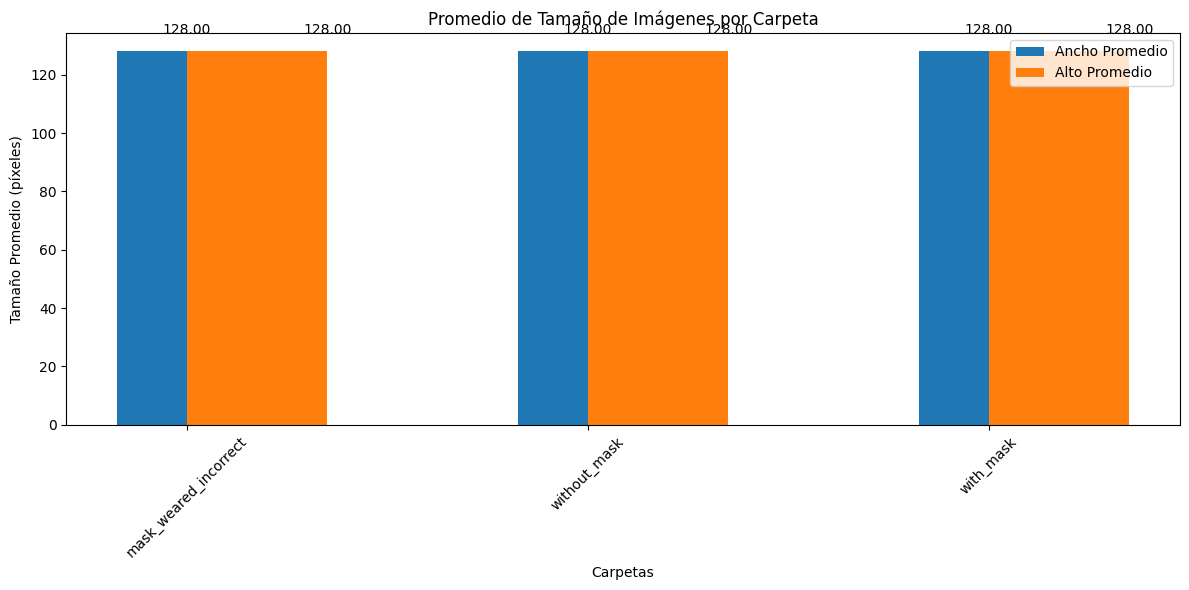

In [7]:

# Definir las listas de carpetas y los tamaños promedio de ancho y altura
subfolders = list(average_sizes.keys())
avg_widths = [size[0] for size in average_sizes.values()]
avg_heights = [size[1] for size in average_sizes.values()]

x = range(len(subfolders))

# Crear la figura y el eje para la gráfica
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
# Crear las barras para el ancho y el alto en el grafico
bars_width = ax.bar(x, avg_widths, width=bar_width, label='Ancho Promedio', align='center')
bars_height = ax.bar(x, avg_heights, width=bar_width, label='Alto Promedio', align='edge')

# Agregar etiquetas de tamaño promedio en la parte superior de cada barra de ancho
for bar, avg_width in zip(bars_width, avg_widths):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{avg_width:.2f}', ha='center', va='bottom')

# Agregar etiquetas de tamaño promedio en la parte superior de cada barra de alto
for bar, avg_height in zip(bars_height, avg_heights):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width(), yval + 5, f'{avg_height:.2f}', ha='center', va='bottom')

# Establecer las etiquetas de los ejes
ax.set_xlabel('Carpetas')
ax.set_ylabel('Tamaño Promedio (píxeles)')
ax.set_title('Promedio de Tamaño de Imágenes por Carpeta')
ax.set_xticks(x)
ax.set_xticklabels(subfolders, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

## Calcular el Tamaño Promedio de Archivos en Cada Carpeta

Se calcula el tamaño promedio de los archivos en cada subcarpeta del dataset y muestra los resultados.


In [8]:
def average_file_size_in_folder(folder_path):
    file_sizes = defaultdict(list)

    # Recorrer cada subcarpeta en la carpeta principal
    for subdir, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith('.png'):
                try:
                    file_path = os.path.join(subdir, file)
                    # Obtener el tamaño del archivo en kilobytes y almacenarlo en la lista correspondiente
                    file_size_kb = os.path.getsize(file_path) / 1024
                    subdir_name = os.path.basename(subdir)
                    file_sizes[subdir_name].append(file_size_kb)
                except Exception as e:
                    print(f"Error al obtener el tamaño del archivo {file}: {e}")

    # Calcular el tamaño promedio de los archivos en cada subcarpeta
    average_sizes = {}
    for subdir, sizes in file_sizes.items():
        if sizes:
            avg_size = sum(sizes) / len(sizes)
            average_sizes[subdir] = avg_size

    return average_sizes

dataset_folder = '/content/dataset/'

# Calcular el tamaño promedio de los archivos en cada subcarpeta
average_sizes = average_file_size_in_folder(dataset_folder)
# Mostrar los resultados
for subfolder, avg_size in average_sizes.items():
    print(f'Carpeta: {subfolder}, Promedio de tamaño: {avg_size:.2f} KB')

Carpeta: mask_weared_incorrect, Promedio de tamaño: 21.20 KB
Carpeta: without_mask, Promedio de tamaño: 29.67 KB
Carpeta: with_mask, Promedio de tamaño: 26.54 KB


## Gráfica del Tamaño Promedio de Archivos por Carpeta


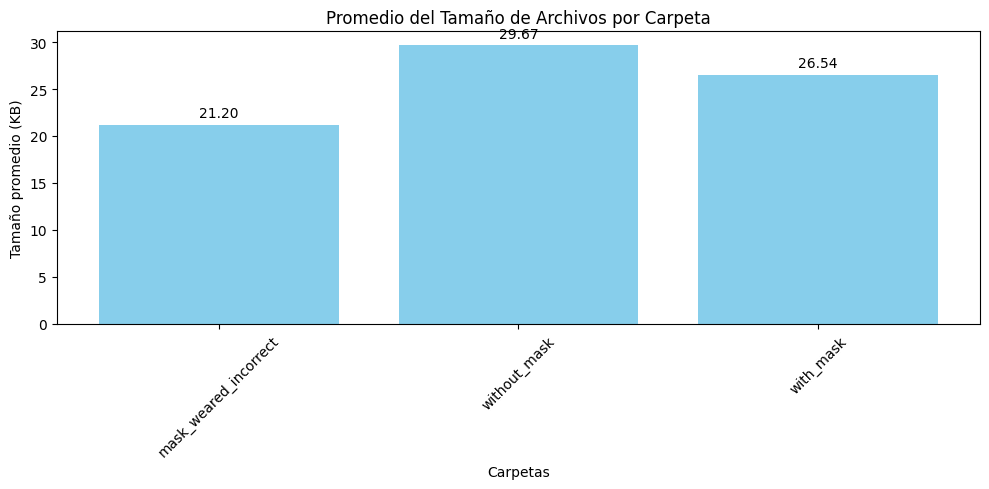

In [9]:
# Convertir el diccionario de promedios de tamaño en listas separadas para subcarpetas y tamaños promedio
subfolders = list(average_sizes.keys())
avg_sizes_kb = list(average_sizes.values())

# Crear una figura para la gráfica con tamaño especificado
plt.figure(figsize=(10, 5))
# Crear las barras de la gráfica utilizando los nombres de las subcarpetas como etiquetas en el eje x
bars = plt.bar(subfolders, avg_sizes_kb, color='skyblue')

# Agregar etiquetas de tamaño promedio en la parte superior de cada barra
for bar, avg_size in zip(bars, avg_sizes_kb):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{avg_size:.2f}', ha='center', va='bottom')

# Configurar etiquetas y título de los ejes
plt.xlabel('Carpetas')
plt.ylabel('Tamaño promedio (KB)')
plt.title('Promedio del Tamaño de Archivos por Carpeta')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Verificación de las Dimensiones de las Imágenes en el Dataset

Este código verifica las dimensiones de todas las imágenes en cada subcarpeta del dataset y muestra un resumen de las dimensiones únicas y la cantidad de imágenes correspondientes.


In [10]:
from PIL import Image
import os
from collections import defaultdict

def check_image_dimensions(folder_path):
    image_dimensions = defaultdict(list)

    # Recorrer cada subcarpeta en la carpeta principal
    for subdir, dirs, files in os.walk(folder_path):
        for file in files:
            # Verificar si el archivo tiene la extensión .png
            if file.lower().endswith('.png'):
                try:
                    file_path = os.path.join(subdir, file)
                    with Image.open(file_path) as img:
                        width, height = img.size
                        subdir_name = os.path.basename(subdir)
                        image_dimensions[subdir_name].append((width, height))
                except Exception as e:
                    print(f"Error al abrir la imagen {file}: {e}")

    return image_dimensions

dataset_folder = '/content/dataset'

# Verificar las dimensiones de las imágenes en cada subcarpeta
image_dimensions = check_image_dimensions(dataset_folder)

# Mostrar un resumen de las dimensiones de las imágenes
for subfolder, dimensions in image_dimensions.items():
    print(f'\nCarpeta: {subfolder}')
    unique_dimensions = set(dimensions)
    for dim in unique_dimensions:
        count = dimensions.count(dim)
        print(f'Tamaño: {dim[0]} x {dim[1]} píxeles - {count} imágenes')





Carpeta: mask_weared_incorrect
Tamaño: 128 x 128 píxeles - 2994 imágenes

Carpeta: without_mask
Tamaño: 128 x 128 píxeles - 2994 imágenes

Carpeta: with_mask
Tamaño: 128 x 128 píxeles - 2994 imágenes
